# Best Fit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

# Introduction
An example of a complex dynamic system is that of a population being infected by a virus in an epidemic/pandemic process, like the ongoing spread of the COVID-19 disease. Compartmental models, like the SIR—susceptible, infected, recovered—model that was proposed by Kermack & McKendrick 1927, have been applied to evaluate and anticipate the progression of such epidemics.

The SIR model is a mathematical model that describes the spread of infectious diseases in a population. It was first introduced by Kermack and McKendrick in a series of papers published in the early 20th century.

The SIR model divides the population into three compartments:

**Susceptible (S)**: Individuals who are susceptible to the disease, meaning they can become infected if exposed to the infectious agent.

**Infected (I)**: Individuals who are currently infected and can transmit the disease to susceptible individuals.

**Recovered (R)**: Individuals who have recovered from the infection and are assumed to be immune, at least for a certain period.

With the COVID-19 epidemic, a simple description may rely on fitting the data for one compartment, but a better description of the epidemic can be obtained by simultaneously fitting the data for different compartments, such as infected, recovered, dead, hospitalized, etc.

# COVID - 19 
The Covid-19 pandemic will undoubtedly remain as the first pandemic of the XXI's century. By means of global communication channels, the authorities around the world were able to instantaneously react and follow the progression of the infection. Since its emergence, epidemiologists, mathematicians, physicists, and public health experts have tried to provide means of anticipating the behavior of the disease in order to help public health authorities with strategies to contain or mitigate the spread of the disease.

$\tau_{I}$ is infiction time: This time represents the average duration it takes for an infected individual to transmit the infection to a susceptible individual.

$\tau_{R}$ is recovery time: This time represents the average duration an individual remains infected before recovering.

Data sets collected from https://www.worldometers.info/coronavirus/country/Ireland/ and https://covid19ireland-geohive.hub.arcgis.com/ for Ireland over a period of about 200 days in 2020. 

SIR model in its basic form:

$$\frac{dS}{dt} = -\frac{1}{\tau_I}\frac{IS}{S+I+R}$$

$$\frac{dI}{dt} = \frac{I}{\tau_I}\frac{IS}{S+I+R} - \frac{I}{\tau_R}$$

$$\frac{dR}{dt} = \frac{I}{\tau_R}$$

The SIR model of equation can be extended to include equations for the total number of cases, T, and the daily new cases, n.

$$\frac{dn}{dt} = n \big(\frac{I}{\tau_I}\frac{S-I}{S+I+R} - \frac{I}{\tau_R}\big)$$

$$\frac{dT}{dt} = n$$

$$\frac{dS}{dt} = -n$$

$$\frac{dI}{dt} = n - \frac{I}{\tau_R}$$

$$\frac{dR}{dt} = \frac{I}{\tau_R}$$

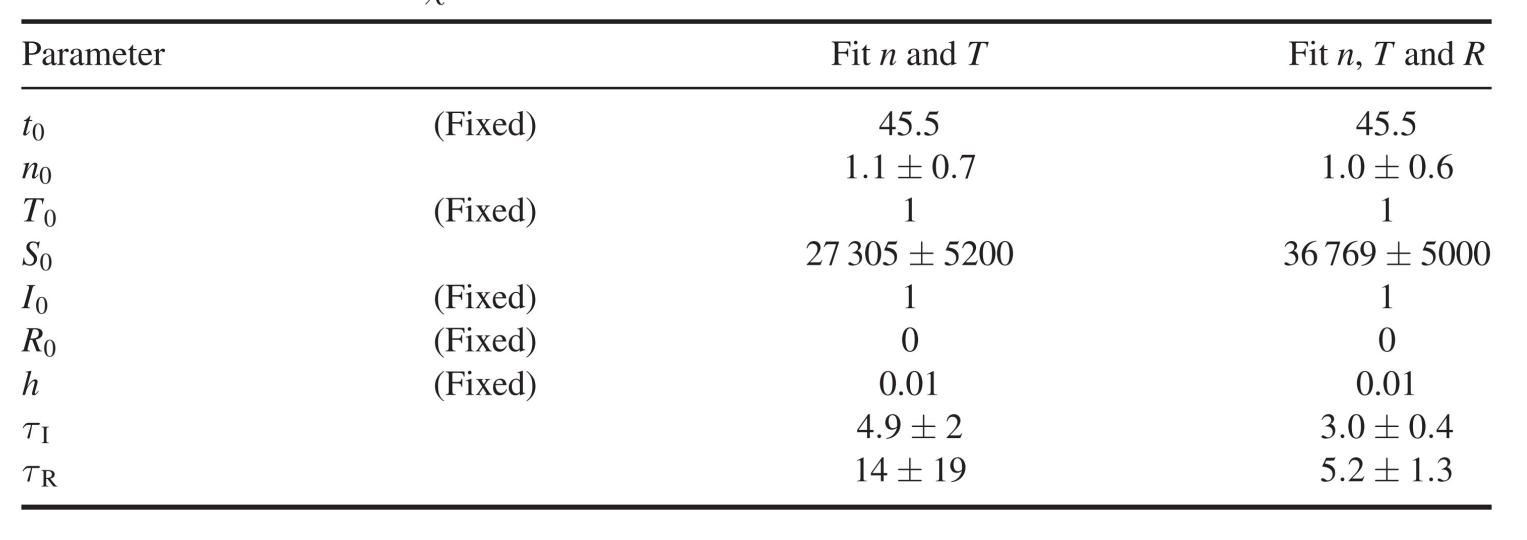

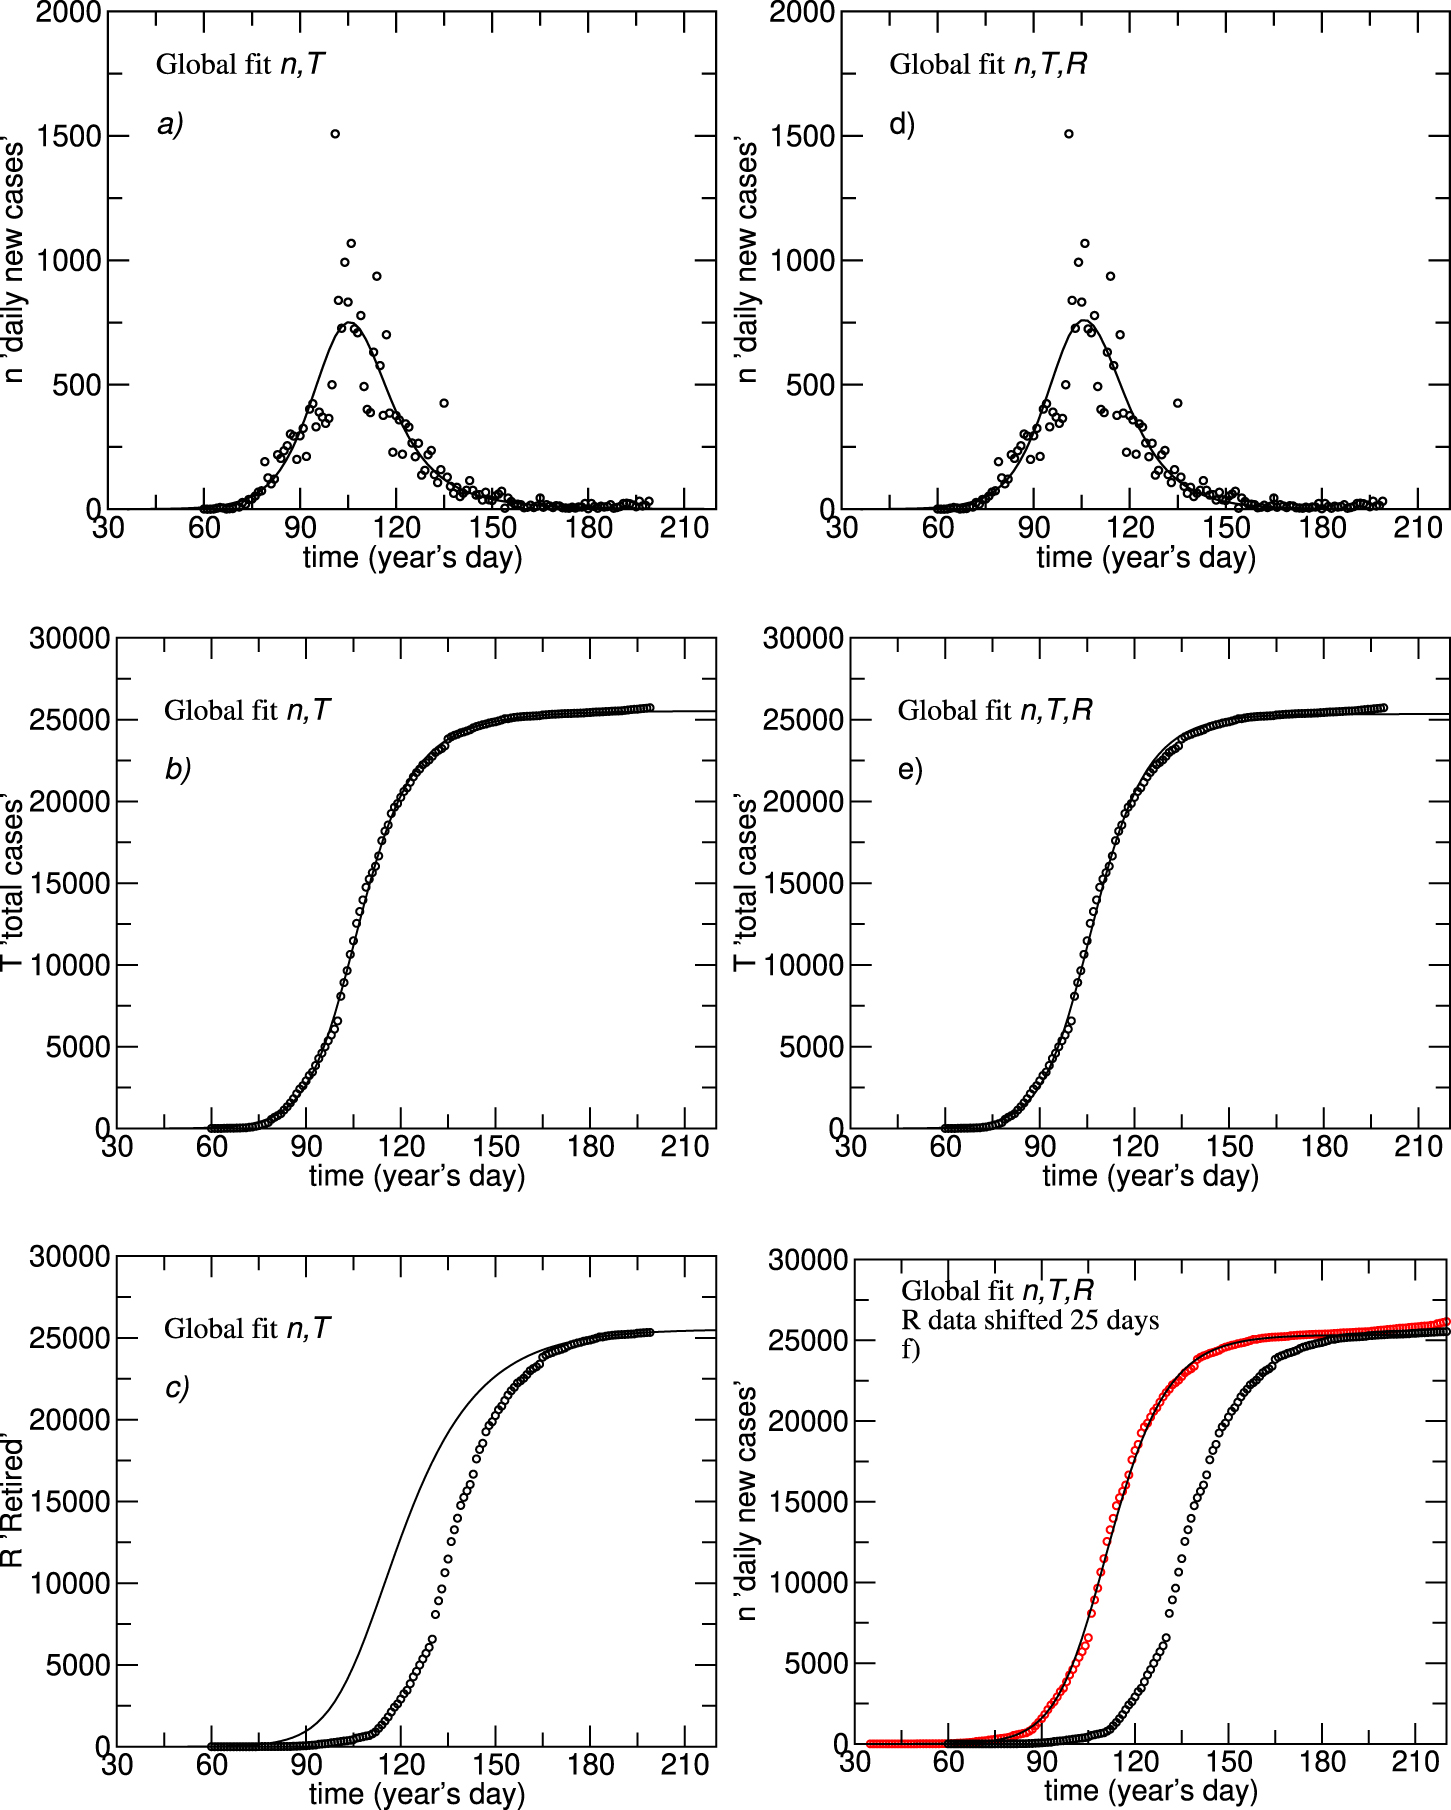

As it can be observed, the fits are reasonably good for the n and T data, but clearly the R data seems to be delayed compared to the model curve. 
The reporting procedure during the first few weeks of the pandamic based on how the data was being collected and the 'recoverd' criteria has often changed during pandamic. This has affected reporting data with some delays " first case reported after 60 days ".
So, having all that in mind, R data was shifted by *15* days. " first case is now reported after 45 days ". This shift made a good model to fit R data.
## future work 
The analysis with this model, although quantitative, is nevertheless crude, on one hand because of reporting related issues and on the other hand as a consequence of model oversimplification. In particular the account of new cases at the beginning was subject to a considerable uncertainty due to the time response of Covid-19 testing procedures. Also, it became evident that some infections were due to contacts between susceptible people and asymptomatic undetected Covid-19 infected people. This last aspect is not taken into account in the present analysis but might be considered in more elaborated models.

C:\Users\basil\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimized Parameters:
n_opt = 0.031 which is OUTSIDE the range [ 0.4 , 1.8 ]
taui_opt = 3.685 which is INSIDE the range [ 2.9 , 6.9 ]
taur_opt = 10.323 which is INSIDE the range [ -5 , 33 ]


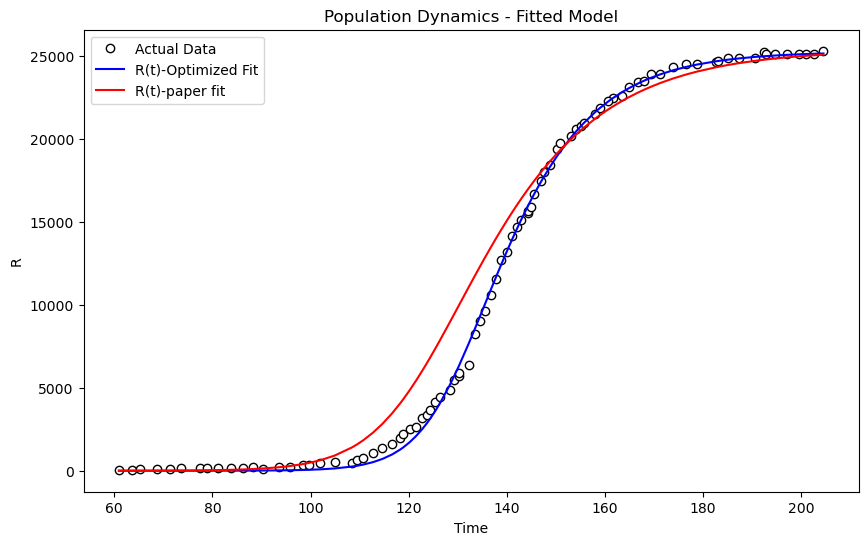

In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, n, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

# Function to calculate the residual (difference between model and data)
def residual(params, t, data):
    n, taui, taur = params
    y0 = [n, 1, 27305, 1, 0]  # Initial conditions
    solution = odeint(model, y0, t, args=(n, taui, taur))
    R_model = solution[:, 4]  # Extract the R(t) values
    return np.sum((R_model - data)**2)  # Sum of squared differences

# Load actual data
file_path = 'Dataset 1.csv' 
df = pd.read_csv(file_path)
x_values = df['x']
y_values = df['y']

# Set initial conditions for my fit
t0 = 45.4
n0 = 1.1 + 0.7
T0 = 1
S0 = 27305 + 1500
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]  # my fit

# Set other parameters for my fit
h = 0.01
taui = 4.9 + 0.4
taur = 14

# Set initial conditions for their fit
t00 = 45.4
n00 = 1.1 #XX
T00 = 1
S00 = 27305 ##XX UP AND DOWN 
I00 = 1
R00 = 0
y00 = [n00, T00, S00, T00, R00] #their fit
# Set other parameters
h = 0.01
taui00 = 4.9 #their fit
taur00 = 14 #their fit
# Ensure the time array is sorted
t_values = np.sort(x_values)

# Perform the fitting using minimize
result = minimize(residual, [n0, taui, taur], args=(t_values, y_values), method='L-BFGS-B')

# Extract the optimized parameters
n_opt, taui_opt, taur_opt = result.x

# Solve the system of differential equations with optimized parameters
y0_opt = [n_opt, 1, 27305, 1, 0]
solution_opt = odeint(model, y0_opt, t_values, args=(n_opt, taui_opt, taur_opt))
R_opt = solution_opt[:, 4]
solution00 = odeint(model, y00, t_values, args=(n0, taui00, taur00))
n00, T00, S00, I00, R00 = solution00[:, 0], solution00[:, 1], solution00[:, 2], solution00[:, 3], solution00[:, 4]

# Print the optimized parameters
print("Optimized Parameters:")
if 0.4 < n_opt < 1.8:
    print(f'n_opt = {n_opt:.3f} which is INSIDE the range [ 0.4 , 1.8 ]')
else:
    print(f'n_opt = {n_opt:.3f} which is OUTSIDE the range [ 0.4 , 1.8 ]')
if 2.9 < taui_opt < 6.9:
    print(f"taui_opt = {taui_opt:.3f} which is INSIDE the range [ 2.9 , 6.9 ]")
else:
    print(f"taui_opt = {taui_opt:.3f} which is OUTSIDE the range [ 2.9 , 6.9 ]")
if -5 < taur_opt < 33:
    print(f"taur_opt = {taur_opt:.3f} which is INSIDE the range [ -5 , 33 ]")
else:
    print(f"taur_opt = {taur_opt:.3f} which is OUTSIDE the range [ -5 , 33 ]")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o', label='Actual Data', markerfacecolor='white', markeredgecolor='black')
plt.plot(t_values, R_opt, label='R(t)-Optimized Fit', color='blue')
plt.plot(t_values, R00, label='R(t)-paper fit', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('R')
plt.title('Population Dynamics - Fitted Model')
plt.show()


# Bifurcation Analysis

In [3]:
# def steadystate_solver(y, n, taui, taur):
#     n, T, S, I, R = y
#     dRdt = steadystate_equations(y, n, taui, taur)
#     return [dRdt, 0, 0, 0, 0]  # Match the shape of the input y_guess

# # Initial guess for the steady state
# y_guess = [n0, T0, S0, I0, R0]

# # Solve for steady state using fsolve
# y_steady = fsolve(steadystate_solver, y_guess, args=(n0, taui, taur))

# # Extract R value from steady state
# R_steady = y_steady[4]

# print(f'Steady state value for R: {R_steady}')


C:\Users\basil\AppData\Local\Temp\ipykernel_29396\2110820810.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
C:\Users\basil\AppData\Local\Temp\ipykernel_29396\2110820810.py:8: RuntimeWarning: invalid value encountered in double_scalars
  dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
C:\Users\basil\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


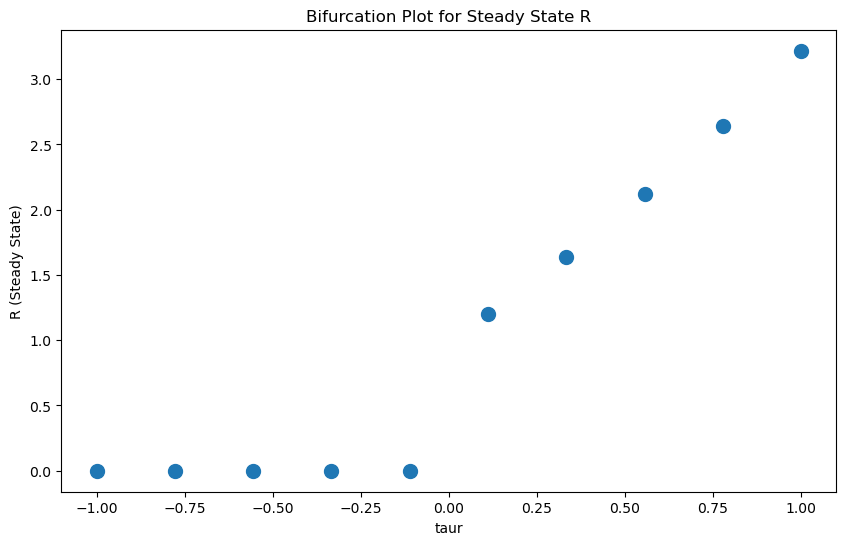

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function
def model(y, t, n, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt


# Set other parameters
t0 = 45.4
h = 0.01

# Define parameter ranges for bifurcation analysis
taur_values = np.linspace(-1, 1, 10)

# Store results for plotting
R_values = []
t = np.arange(t0, 200, h)

# Perform bifurcation analysis
for taur in taur_values:
    # Solve the system of ODEs for each parameter set
    sol = odeint(model, y0, t, args=(n0, taui, taur))

    # Extract and store the values of interest (e.g., 'R' at a specific time)
    R_values.append(sol[-1, 4])  # Taking the value of 'R' at the end of the simulation

# Plot bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot(taur_values, R_values, 'o', markersize=10, linewidth=6)
plt.xlabel('taur')
plt.ylabel('R (Steady State)')
plt.title('Bifurcation Plot for Steady State R')
plt.show()


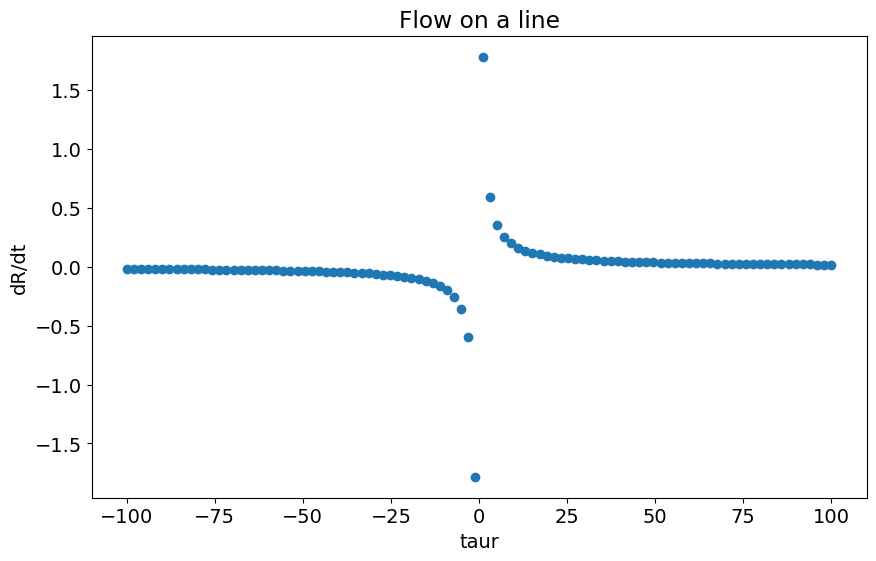

In [5]:
def model(y, t, n, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

def dRdt(R, n, taur):
    return n / taur

t0 = 45.4
n0 = 1.1 + 0.7
T0 = 1
S0 = 27305 + 1500
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]

# Set other parameters
t0 = 45.4
h = 0.01

# Define parameter ranges for bifurcation analysis
taur_values = np.linspace(-100, 100, 100)

dRdt_values2 = []
for taur in taur_values:
    dRdt_values2.append(dRdt(y0[4], n0, taur))
    
# Plot derivative vs y
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("taur")
plt.ylabel("dR/dt")
plt.title("Flow on a line")
plt.plot(taur_values,dRdt_values2,'o');


# Sensitivity Analysis

# local (taui and taur)

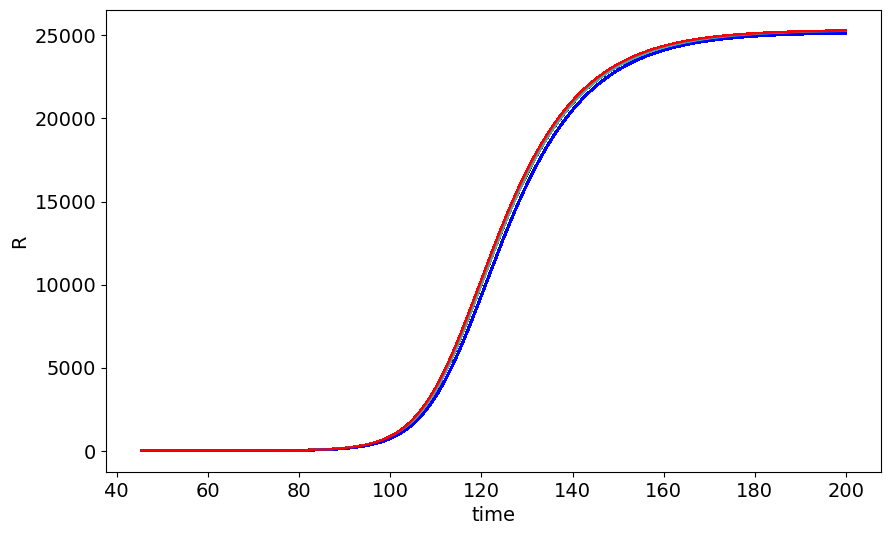

25250.56424070976


In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

# Set initial conditions
t0 = 45.4
n0 = 1.1
T0 = 1
S0 = 27305
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]

# Set other parameters
h = 0.01

# Create a time array
t = np.arange(t0, 200, h)

N = 1000  # iterations
taur = 14
taui = 5.3

R = np.zeros(N)
plt.figure(figsize=(10, 6))
for m in np.arange(0, N, 1):
    output = odeint(model, y0_opt, t, args=(taui_opt, taur_opt))
    output1 = odeint(model, y0_opt, t, args=(taui_opt*1.01, taur_opt))
    output2 = odeint(model, y0_opt, t, args=(taui_opt, taur_opt*1.01))

#     output = odeint(model, y0, t, args=(taui, taur))
#     output1 = odeint(model, y0, t, args=(taui*1.01, taur))
#     output2 = odeint(model, y0, t, args=(taui, taur*1.01))
    plt.plot(t, output[:, 4])  # Assuming R is the 5th variable
    plt.plot(t, output1[:, 4],'b',label = 'taui')  # Assuming R is the 5th variable
    plt.plot(t, output2[:, 4],'r', label = 'taur')  # Assuming R is the 5th variable
    plt.xlabel("time")
    plt.ylabel("R")
    R[m] = output[-1, 4]
plt.show()
print(output[-1,1])

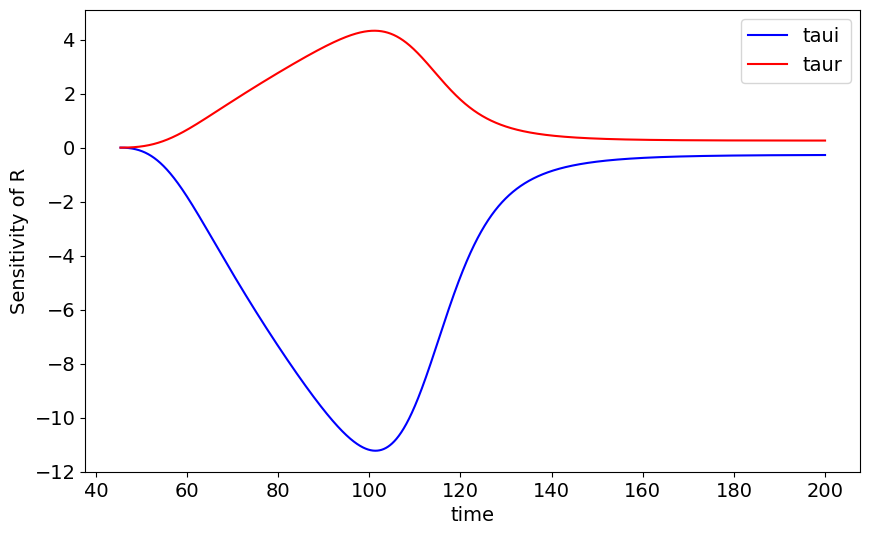

In [7]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of R")
plt.plot(t, ((output1[:,1] - output[:,1])/output[:,1])/0.01,'b', label = "taui");
plt.plot(t, ((output2[:,1] - output[:,1])/output[:,1])/0.01,'r', label = "taur");
plt.legend()

# Global (taui and taur)

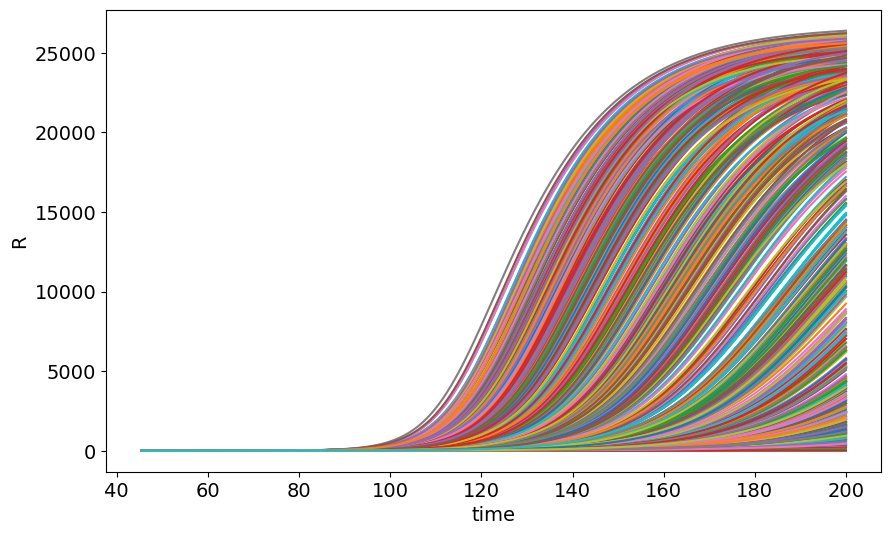

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(y, t, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

# Set initial conditions
t0 = 45.4
n0 = 1.1
T0 = 1
S0 = 27305
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]

# Set other parameters
h = 0.01

# Create a time array
t = np.arange(t0, 200, h)

N = 1000  # iterations
taur = np.random.uniform(14 * 0.8, 14 * 1.2, N)
taui = np.random.uniform(5.3 * 0.8, 5.3 * 2, N)

R = np.zeros(N)
plt.figure(figsize=(10, 6))
for m in np.arange(0, N, 1):
    output = odeint(model, y0_opt, t, args=(taui[m], taur[m]))
    plt.plot(t, output[:, 4])  # Assuming R is the 5th variable
    plt.xlabel("time")
    plt.ylabel("R")
    R[m] = output[-1, 4]

plt.show()


<Figure size 1000x600 with 0 Axes>

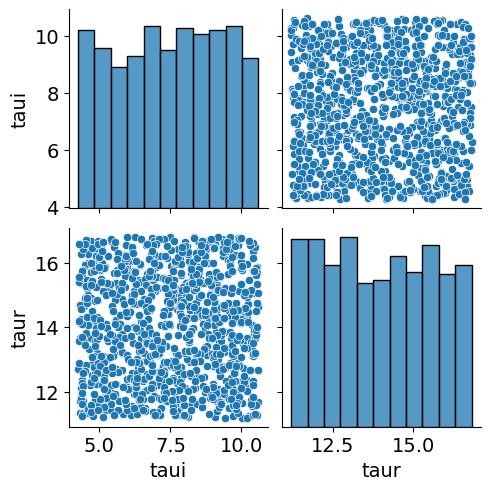

In [9]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(10, 6))
tmp = {'taui':taui, 'taur':taur};
df = pd.DataFrame(tmp);
del(tmp)
sns.pairplot(df)  
20
plt.show()

Our fitted equn is y =  -1.3686560285334146 taui +  0.48216140870873847 taur


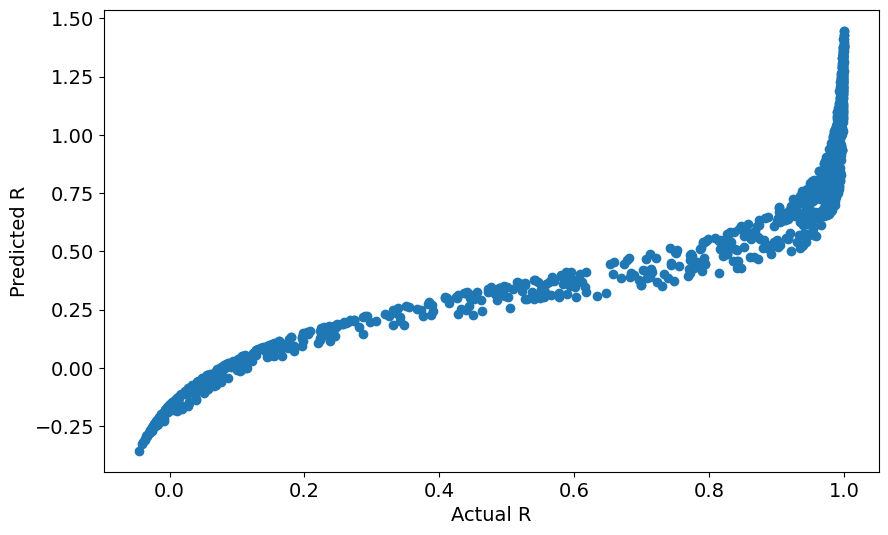

In [10]:
A = (25250.56-R)/25250.56;
X = np.c_[(5.3-taui)/(5.3),(14-taur)/14]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ A;
print("Our fitted equn is y = ",params[0], "taui + ", params[1], "taur")
plt.figure(figsize=(10, 6))
plt.plot(A,X @ params,"o");
plt.ylabel("Predicted R"); #final R value
plt.xlabel("Actual R");


# local (taur)

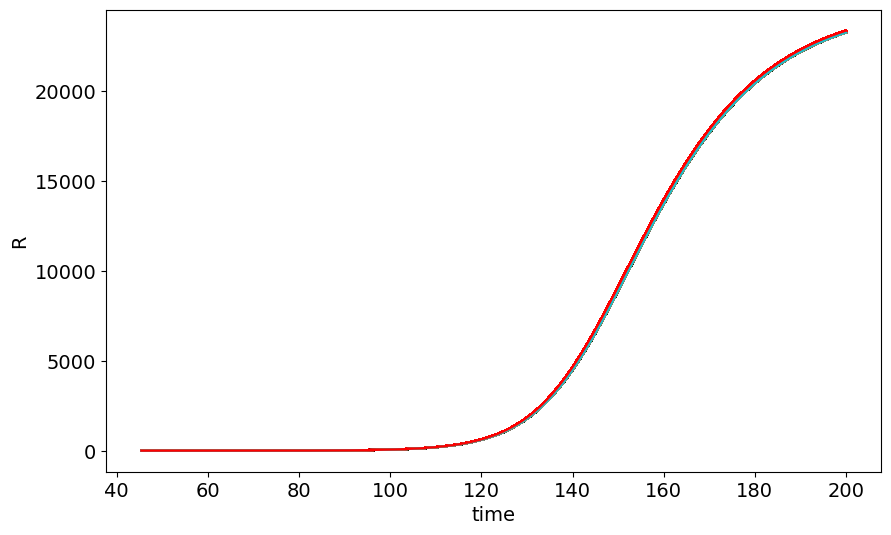

In [11]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# # Define the system of differential equations
# def model(y, t, taui, taur):
#     n, T, S, I, R = y
#     dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
#     dTdt = n
#     dSdt = -n
#     dIdt = n - I/taur
#     dRdt = I/taur
#     dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
#     return dydt

# # Set initial conditions
# t0 = 45.4
# n0 = 1.1
# T0 = 1
# S0 = 27305
# I0 = 1
# R0 = 0
# y0 = [n0, T0, S0, I0, R0]

# # Set other parameters
# h = 0.01

# # Create a time array
# t = np.arange(t0, 200, h)

# N = 1000  # iterations
# taur = 14
# taui = 5.3

# R = np.zeros(N)
# plt.figure(figsize=(10, 6))
# for m in np.arange(0, N, 1):
#     output = odeint(model, y0_opt, t, args=(taui, taur))
#     output2 = odeint(model, y0_opt, t, args=(taui, taur*1.01))
    
#     plt.plot(t, output[:, 4])  # Assuming R is the 5th variable
#     plt.plot(t, output2[:, 4],'r')  # Assuming R is the 5th variable

#     plt.xlabel("time")
#     plt.ylabel("R")
#     R[m] = output[-1, 4]
# plt.show()


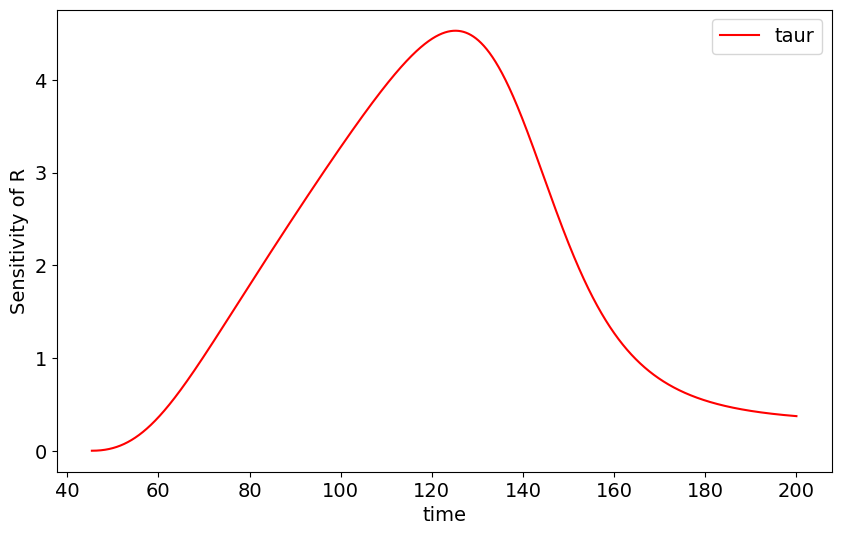

In [12]:
# plt.figure(figsize=(10, 6))
# plt.rcParams.update({'font.size': 14})  # increase the font size
# plt.xlabel("time")
# plt.ylabel("Sensitivity of R")
# plt.plot(t, ((output2[:,1] - output[:,1])/output[:,1])/0.01,'r', label = "taur");
# plt.legend()

# Global (taur)

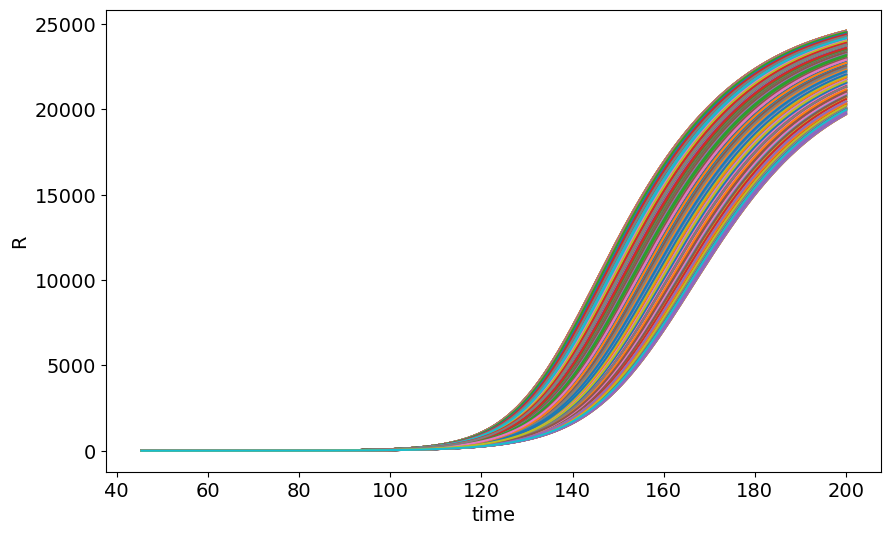

In [13]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# # Define the system of differential equations
# def model(y, t, taui, taur):
#     n, T, S, I, R = y
#     dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
#     dTdt = n
#     dSdt = -n
#     dIdt = n - I/taur
#     dRdt = I/taur
#     dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
#     return dydt

# # Set initial conditions
# t0 = 45.4
# n0 = 1.1
# T0 = 1
# S0 = 27305
# I0 = 1
# R0 = 0
# y0 = [n0, T0, S0, I0, R0]

# # Set other parameters
# h = 0.01

# # Create a time array
# t = np.arange(t0, 200, h)

# N = 1000  # iterations
# taur = np.random.uniform(14 * 0.8, 14 * 1.2, N)
# taui = 5.3
# #np.random.uniform(4.9 * 0.8, 4.9 * 2, N)
# R = np.zeros(N)
# plt.figure(figsize=(10, 6))
# for m in np.arange(0, N, 1):
#     output = odeint(model, y0_opt, t, args=(taui, taur[m]))
#     plt.plot(t, output[:, 4])  # Assuming R is the 5th variable
#     plt.xlabel("time")
#     plt.ylabel("R")
#     R[m] = output[-1, 4]

# plt.show()

<Figure size 1000x600 with 0 Axes>

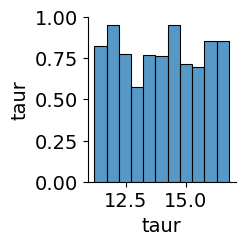

In [14]:
# import pandas as pd
# import seaborn as sns
# plt.figure(figsize=(10, 6))
# tmp = {'taur':taur};
# df = pd.DataFrame(tmp);
# del(tmp)
# sns.pairplot(df)  
# 20
# plt.show()

Our fitted equn is y =  0.4577036046293202 taur


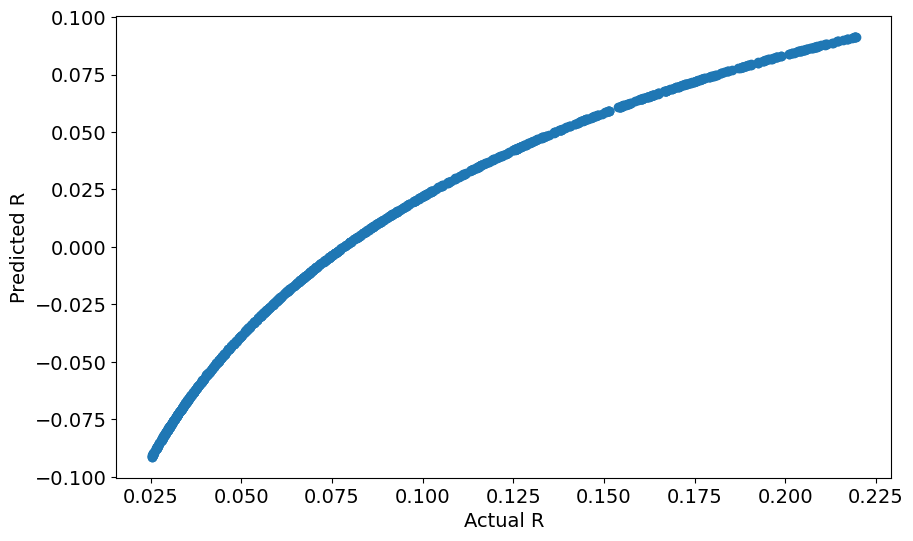

In [15]:
# A = (25250.56-R)/25250.56;
# X = np.c_[(14-taur)/14]

# from numpy.linalg import inv
# tmp = inv(np.matmul(np.transpose(X),X));

# params = tmp @ np.transpose(X) @ A;
# print("Our fitted equn is y = ", params[0], "taur")
# plt.figure(figsize=(10, 6))
# plt.plot(A,X @ params,"o");
# plt.ylabel("Predicted R");
# plt.xlabel("Actual R");
